# 加载模型

In [12]:
import numpy as np
Weight=np.loadtxt("modelmini.txt")

## 加载数据

In [13]:
a=np.loadtxt('mnist_test.csv',delimiter=',')
testfeature=a[:1000,1:]
ones=np.ones((len(testfeature),1))
testFeature=np.hstack((testfeature/255.0,ones))

## 预测数据

In [3]:
j=32
np.argmax(np.exp(np.dot(testFeature[j].reshape(1,-1),Weight))/np.sum(np.exp(np.dot(testFeature[j].reshape(1,-1),Weight))))

3

<IPython.core.display.Javascript object>


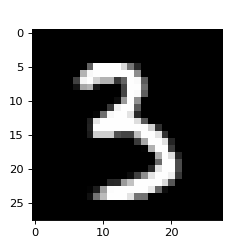

In [4]:
import matplotlib.pyplot as plt
%matplotlib notebook
fig=plt.figure(figsize=(3,3),dpi=50)
plt.imshow(testfeature[j].reshape(28,28),cmap='gray')
plt.show()

## 评估模型的准确度

In [14]:
testfeature=a[:,1:]
ones=np.ones((len(testfeature),1))
testFeature=np.hstack((testfeature/255.0,ones))

testlabel=a[:,0:1].astype(int)
# 独热编码后的数据
# testLabel=np.eye(10)[testlabel.T[0]]

In [15]:
count=0#记录正确预测的数量
for j in range(len(testFeature)):
    # 预测的值
    result=np.argmax(np.exp(np.dot(testFeature[j].reshape(1,-1),Weight))/np.sum(np.exp(np.dot(testFeature[j].reshape(1,-1),Weight))))
    # 真实的值
    actual=testlabel[j]
    if result==actual:
        count+=1
        
print("模型的准确度：{}".format(count/len(testFeature)))  

模型的准确度：0.9198


## 预测一张真实手写的照片

In [16]:
## 如果你电脑环境没有安装OpenCV，执行下面命令
# !pip install opencv-python

In [29]:
import cv2
image=cv2.imread('356.bmp')
cv2.imshow("image",image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [30]:
## 模型预测的是灰度图
## 使用OpenCV转换为灰度图
# bgr-->gray
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2.imshow("image",gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [31]:
## 高斯模糊后的图片，去噪点
blurred=cv2.GaussianBlur(gray,(5,5),0)
cv2.imshow("image",blurred)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [32]:
## 提取边缘
edge=cv2.Canny(blurred,30,150)
cv2.imshow("image",edge)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [33]:
## 把图片上的数字抠出来
contours,_=cv2.findContours(edge.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
contours

(array([[[242,  15]],
 
        [[241,  16]],
 
        [[240,  16]],
 
        [[240,  17]],
 
        [[239,  18]],
 
        [[239,  19]],
 
        [[238,  20]],
 
        [[238,  21]],
 
        [[237,  22]],
 
        [[237,  23]],
 
        [[235,  25]],
 
        [[235,  27]],
 
        [[234,  28]],
 
        [[234,  30]],
 
        [[232,  32]],
 
        [[232,  34]],
 
        [[231,  35]],
 
        [[231,  38]],
 
        [[230,  39]],
 
        [[230,  43]],
 
        [[229,  44]],
 
        [[229,  46]],
 
        [[227,  48]],
 
        [[227,  50]],
 
        [[226,  51]],
 
        [[226,  54]],
 
        [[225,  55]],
 
        [[225,  60]],
 
        [[224,  61]],
 
        [[224,  66]],
 
        [[223,  67]],
 
        [[223,  70]],
 
        [[224,  71]],
 
        [[224,  74]],
 
        [[225,  75]],
 
        [[226,  75]],
 
        [[234,  83]],
 
        [[235,  83]],
 
        [[238,  86]],
 
        [[239,  86]],
 
        [[240,  87]],
 
        [[251,  

In [42]:
## 基于外边框的坐标，提取包裹数字的矩形
for c in contours:
    (x,y,w,h)=cv2.boundingRect(c)
    # 把大小改成28*28
    #aa=cv2.resize(gray[y:y+h,x:x+w],(28,28))
    aa=cv2.resize(gray[y-5:y+5+h,x-5:x+w+5],(28,28))
    pre_img=255-aa
    ## 交给模型预测    
    value=np.hstack((pre_img.reshape(1,-1)/255,np.array([[1]])))
    result=np.argmax(np.exp(np.dot(value,Weight))/np.sum(np.exp(np.dot(value,Weight))))
    print("预测的结果是：{}".format(result))
    
    cv2.imshow("image",pre_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

预测的结果是：3
预测的结果是：5
预测的结果是：3


In [39]:
np.hstack((pre_img.reshape(1,-1)/255,np.array([[1]])))

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.65882353, 0.65882353, 0.65882353, 0.65882353, 0.65882353,
        0.65882353, 0.65882353, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.98431373, 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.98039216, 0.19215686, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.27843137, 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.71372549, 0.29803922, 0.  